In [1]:
## Load data
import glob
import pandas as pd
import pickle

# group = 'gender'
# group = 'age'
group = 'race'
df = pd.read_csv(r'/home/hbt/jchr_data/jchr_racial_diff/results/preprocessed_data/1_2_model_input_ws60min_ph60min_v6.csv')




# Define the path to your folder
folder_path = rf'/home/hbt/jchr_data/jchr_racial_diff/results/processed_data/2_1_1_predicted_results_rnn_v6_{group}'

# Pattern to match the files
file_pattern = f'{folder_path}/patient*_ratio*.pkl'

# Dictionary to store the data
dictionary = {}

# Iterate over files matched by glob
for file_path in glob.glob(file_pattern):
    with open(file_path, 'rb') as file:
        # Extracting N and X from the filename
        filename = file_path.split('/')[-1]  # Adjust if necessary based on your OS
        patient_id, ratio_id = filename.replace('.pkl', '').split('_')
        # Extracting numeric parts from patient_id and ratio_id
        patient_num = ''.join(filter(str.isdigit, patient_id))
        ratio_num = ''.join(filter(str.isdigit, ratio_id))
        
        # Load the content of the file
        file_data = pickle.load(file)

        # Store the data
        dictionary.update(file_data)

# Now loaded_data contains all your files' data
outer_keys = dictionary.keys()
print("Outer keys:", list(outer_keys))
inner_keys = dictionary[(172, 100)].keys()
print("Inner keys:", list(inner_keys))

Outer keys: [(172, 100), (158, 0), (59, 100), (79, 10), (210, 70), (149, 50), (35, 30), (183, 30), (123, 60), (76, 10), (74, 90), (160, 40), (105, 70), (86, 100), (13, 20), (146, 50), (39, 0), (52, 80), (220, 30), (121, 100), (179, 10), (206, 20), (49, 50), (23, 60), (195, 60), (135, 30), (83, 30), (60, 40), (176, 10), (174, 90), (209, 20), (152, 80), (46, 50), (16, 90), (14, 10), (102, 40), (57, 30), (141, 60), (92, 50), (124, 50), (30, 80), (66, 0), (186, 80), (174, 0), (167, 70), (71, 20), (15, 0), (217, 40), (19, 90), (58, 30), (215, 100), (107, 0), (20, 100), (189, 80), (96, 0), (231, 50), (168, 70), (184, 0), (116, 90), (114, 10), (157, 30), (187, 100), (130, 80), (86, 80), (192, 50), (162, 0), (24, 50), (5, 80), (70, 0), (171, 20), (67, 70), (73, 100), (203, 90), (111, 0), (158, 100), (158, 30), (89, 80), (192, 0), (80, 0), (68, 70), (178, 70), (221, 50), (199, 80), (48, 30), (21, 100), (214, 100), (207, 40), (1, 50), (177, 70), (61, 20), (134, 50), (82, 50), (220, 0), (196, 80)

### Extract one PtID with one ratio from dictionary

In [2]:
import numpy as np

path_seg_csv = "/home/hbt/miniforge3/envs/env_study1_v3/lib/python3.11/site-packages/methcomp/static/seg.csv"

data = np.loadtxt(path_seg_csv)

y_actual = dictionary[(4,20)]['y_actual']
y_pred = dictionary[(4, 20)]['y_pred']

n = 18

ref = y_actual * n
pred = y_pred * n
pred = np.clip(pred, None, 599)
print(
    np.shape(ref),
    np.shape(pred),
    print(y_actual.max())
)
# from . import static  # temporary fix


i = 0
for p, r in zip(pred, ref):
    print(i ,int(p), int(r))
    print(i, data.T[int(p), int(r)])
    print("---")
    i += 1


print("Number of values above 600:",np.sum(pred > 600))    
#data = np.loadtxt(pkg_resources.open_text(static, "seg.csv"))
# _zones = np.array([data.T[int(p), int(t)] for p, t in zip(pred, ref)])

_zones = np.array(data.T[int(p), int(t)] for p, t in zip(pred, ref))

#print(int(y_pred))


# print(_zones)

27.65486725663717
(672, 1) (672, 1) None
0 296 362
0 0.40712
---
1 350 365
1 0.17557
---
2 321 386
2 0.17812
---
3 381 403
3 0.28499
---
4 352 417
4 0.31298
---
5 360 418
5 0.30789
---
6 421 399
6 0.31552
---
7 404 371
7 0.32316
---
8 422 347
8 0.52672
---
9 393 324
9 0.21883
---
10 336 295
10 0.29771
---
11 298 267
11 0.063613
---
12 291 246
12 0.31552
---
13 260 231
13 0.28499
---
14 217 222
14 0.012723
---
15 204 210
15 0.0
---
16 202 197
16 0.28753
---
17 197 186
17 0.0076336
---
18 198 177
18 0.48092
---
19 180 184
19 0.37405
---
20 172 231
20 0.63868
---
21 166 300
21 0.89822
---
22 160 355
22 1.2621
---
23 201 358
23 0.65649
---
24 298 337
24 0.23155
---
25 376 330
25 0.2112
---
26 398 327
26 0.21883
---
27 312 322
27 0.0
---
28 287 325
28 0.2341
---
29 318 327
29 0.0
---
30 301 313
30 0.0
---
31 298 313
31 0.22901
---
32 321 312
32 0.0
---
33 313 295
33 0.29008
---
34 272 313
34 0.23919
---
35 312 366
35 0.17812
---
36 289 471
36 0.74809
---
37 248 497
37 0.96183
---
38 350 497

/tmp/ipykernel_2965082/991320426.py:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(i ,int(p), int(r))
/tmp/ipykernel_2965082/991320426.py:26: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(i, data.T[int(p), int(r)])


In [3]:
ref.dtype

dtype('float64')

In [4]:
[data.T[int(p), int(t)] for p, t in zip(pred, ref)]

/tmp/ipykernel_2965082/352313238.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  [data.T[int(p), int(t)] for p, t in zip(pred, ref)]


[0.40712,
 0.17557,
 0.17812,
 0.28499,
 0.31298,
 0.30789,
 0.31552,
 0.32316,
 0.52672,
 0.21883,
 0.29771,
 0.063613,
 0.31552,
 0.28499,
 0.012723,
 0.0,
 0.28753,
 0.0076336,
 0.48092,
 0.37405,
 0.63868,
 0.89822,
 1.2621,
 0.65649,
 0.23155,
 0.2112,
 0.21883,
 0.0,
 0.2341,
 0.0,
 0.0,
 0.22901,
 0.0,
 0.29008,
 0.23919,
 0.17812,
 0.74809,
 0.96183,
 0.51399,
 0.11959,
 0.33842,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.050891,
 0.36641,
 0.37405,
 0.0025445,
 0.23664,
 0.15013,
 0.23155,
 0.23919,
 0.29771,
 0.31043,
 0.31552,
 0.33842,
 0.84733,
 1.2392,
 1.4402,
 0.5827,
 0.55216,
 0.035623,
 0.0,
 0.51399,
 1.2188,
 1.4198,
 1.4555,
 1.0127,
 0.53181,
 1.0127,
 0.3944,
 0.33333,
 0.6972,
 0.0,
 0.53181,
 0.4402,
 0.022901,
 0.17557,
 0.21374,
 0.32061,
 0.21883,
 0.0025445,
 0.31298,
 0.16539,
 0.74809,
 1.2265,
 0.71756,
 0.24682,
 0.23919,
 0.50891,
 0.27226,
 0.38422,
 0.40712,
 0.17557,
 0.20356,
 0.2112,
 0.51399,
 0.36132,
 0.28499,
 0.33842,
 0.34351,
 0.44529,
 0.0101

In [5]:
np.shape(data)

(600, 600)

In [6]:
# y_actual = dictionary[(4, 0)]['y_actual']
# y_pred = dictionary[(4, 0)]['y_pred']

import numpy as np
print('max:',np.max(y_actual))
print('min:',np.min(y_actual))

max: 27.65486725663717
min: 2.8761061946902657


SEG scores: [0.40712   0.17557   0.17812   0.28499   0.46056   0.31298   0.31552
 0.0076336 0.52672   0.21883   0.29771   0.063613  0.30789   0.28499
 0.02799   0.        0.        0.0076336 0.48092   0.39949   0.64631
 0.89822   1.2621    0.84987   0.0025445 0.21883   0.53435   0.
 0.22901   0.        0.        0.22901   0.        0.29008   0.26972
 0.17812   0.74555   0.96183   0.36641   0.11959   0.33842   0.
 0.        0.        0.        0.        0.        0.050891  0.36641
 0.37405   0.0025445 0.23664   0.15013   0.23155   0.26972   0.29771
 0.31043   0.31043   0.38931   0.84733   1.2392    1.4402    0.5827
 0.42494   0.0050891 0.61832   0.096692  1.1908    1.4198    1.4504
 1.0127    1.0025    1.0992    0.40204   0.33333   0.6972    0.
 0.0050891 0.4402    0.38931   0.0025445 0.2112    0.20102   0.21883
 0.0025445 0.31298   0.20611   0.74809   1.1196    0.71756   0.24682
 0.23919   0.50891   0.45293   0.38422   0.40712   0.02799   0.20356
 0.2112    0.51399   0.35369   0.28499 

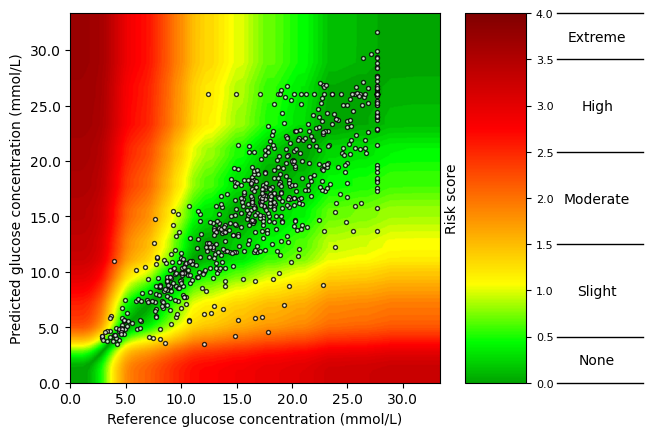

In [7]:
y_actual = dictionary[(4, 0)]['y_actual']
y_pred = dictionary[(4, 0)]['y_pred']

from random import uniform

import matplotlib.pyplot as plt

from methcomp import seg, segscores

zones = segscores(y_actual, y_pred, units="mmol")
print("SEG scores: {}".format(zones))

seg(y_actual, y_pred, units="mmol", percentage=False)
plt.show()

In [8]:
import my_utils
import numpy as np
iteration = 1
dict_results = {}

for (PtID, percentage), value in dictionary.items():
    

    # print('Iteration:',iteration,'PtID:',PtID,'ratio:' ,percentage)
    iteration=iteration+1
    print('patient ID: ',PtID, 'ratio: ', percentage)
    # My actual/true values and my baseline value
    y_actual = value['y_actual']
    y_last_value = value['y_last_val']
    y_pred_single = value['y_pred_single']
    y_pred_base = value['y_pred']
    y_pred_tl = value['y_pred_tl']
    y_last_value2 = y_last_value.values.reshape(-1, 1) # make y_last_val to nparray (672,1) from Series (672,)
    

    zones_base = segscores(y_actual, y_pred_base, units="mmol")
    zones_naive = segscores(y_actual, y_last_value, units="mmol")
    zones_single = segscores(y_actual, y_pred_single, units="mmol")
    zones_tl = segscores(y_actual, y_pred_tl, units="mmol")
     
    dict_results[(PtID, percentage)] = {
        "ptid_test": value['PtId_test'],
        "ptid_group": value['ptid_group'],
        "zones_naive": zones_naive,
        "zones_single": zones_single,
        "zones_base": zones_base,
        "zones_tl": zones_tl
    
    }


patient ID:  172 ratio:  100
patient ID:  158 ratio:  0
patient ID:  59 ratio:  100
patient ID:  79 ratio:  10
patient ID:  210 ratio:  70
patient ID:  149 ratio:  50
patient ID:  35 ratio:  30
patient ID:  183 ratio:  30
patient ID:  123 ratio:  60
patient ID:  76 ratio:  10
patient ID:  74 ratio:  90
patient ID:  160 ratio:  40
patient ID:  105 ratio:  70
patient ID:  86 ratio:  100
patient ID:  13 ratio:  20
patient ID:  146 ratio:  50
patient ID:  39 ratio:  0
patient ID:  52 ratio:  80
patient ID:  220 ratio:  30
patient ID:  121 ratio:  100
patient ID:  179 ratio:  10
patient ID:  206 ratio:  20
patient ID:  49 ratio:  50
patient ID:  23 ratio:  60
patient ID:  195 ratio:  60
patient ID:  135 ratio:  30
patient ID:  83 ratio:  30
patient ID:  60 ratio:  40
patient ID:  176 ratio:  10
patient ID:  174 ratio:  90
patient ID:  209 ratio:  20
patient ID:  152 ratio:  80
patient ID:  46 ratio:  50
patient ID:  16 ratio:  90
patient ID:  14 ratio:  10
patient ID:  102 ratio:  40
patien

KeyboardInterrupt: 

In [9]:
y_pred_base3 =np.clip(y_pred_base, None, 599)
y_pred_base3*18

array([[242.75803 ],
       [213.97533 ],
       [177.57245 ],
       [157.52148 ],
       [156.46524 ],
       [165.27382 ],
       [152.10693 ],
       [150.27864 ],
       [163.08446 ],
       [149.38693 ],
       [161.88226 ],
       [169.21887 ],
       [165.11101 ],
       [168.17358 ],
       [173.2778  ],
       [193.47427 ],
       [202.40652 ],
       [225.31003 ],
       [237.00723 ],
       [244.3061  ],
       [218.68552 ],
       [230.80817 ],
       [281.38504 ],
       [264.93527 ],
       [262.0796  ],
       [264.46353 ],
       [235.46143 ],
       [235.76218 ],
       [242.27574 ],
       [241.18962 ],
       [241.7876  ],
       [249.28331 ],
       [248.90677 ],
       [230.3225  ],
       [224.40224 ],
       [245.45828 ],
       [263.98886 ],
       [243.42769 ],
       [229.17403 ],
       [263.50867 ],
       [360.51645 ],
       [368.43497 ],
       [385.58936 ],
       [379.465   ],
       [369.8577  ],
       [381.4907  ],
       [428.70682 ],
       [461.0

In [10]:
file_path = f"../results/processed_data/3_3_calculated_zones/3_3_calculated_zones_v6_{group}.pkl"
        
        
with open(file_path, 'wb') as file:
# Serialize and save the list to the file
    pickle.dump(dict_results, file)
        

In [11]:
    
import my_utils
import numpy as np
iteration = 1
dict_zones = {}
dict_counts = {}
def replace_values_in_intervals(arr, intervals):
    """
    Replace values within specified intervals in a NumPy array.
    
    Parameters:
    - arr (numpy.ndarray): The array to modify.
    - intervals (list of tuples): Each tuple contains three elements (lower_bound, upper_bound, new_value).
    
    Returns:
    - numpy.ndarray: The modified array with replaced values.
    """
    # Ensure the array is a numpy array
    arr = np.array(arr)
    
    for lower, upper, new_value in intervals:
        arr[(arr >= lower) & (arr < upper)] = new_value
        
    return arr

def count_values(arr, values):
    """
    Count occurrences of specific values in a NumPy array.

    Parameters:
    - arr (numpy.ndarray): The array to inspect.
    - values (list): A list of values to count in the array.

    Returns:
    - Multiple integer counts corresponding to each value in the 'values' list.
    """
    counts = [np.count_nonzero(arr == value) for value in values]
    return tuple(counts)  # Return counts as a tuple

intervals = [(0.0, 0.5, 0),(0.5, 1.5, 1), (1.5, 2.5, 2), (2.5, 3.5, 3), (3.5, 4, 4)]
# Intervals (lower limit, upper limit, new value)
values_to_count = [0, 1, 2, 3, 4]

for (PtID, percentage), value in dictionary.items():
    
    if PtID == 4:
        continue

    # print('Iteration:',iteration,'PtID:',PtID,'ratio:' ,percentage)
    iteration=iteration+1
    print('patient ID: ',PtID, 'ratio: ', percentage)
    # My actual/true values and my baseline value
    y_actual = value['y_actual']
    y_last_value = value['y_last_val']
    y_pred_single = value['y_pred_single']
    y_pred_base = value['y_pred']
    y_pred_tl = value['y_pred_tl']
    y_last_value2 = y_last_value.values.reshape(-1, 1) # make y_last_val to nparray (672,1) from Series (672,)
        
        
    zones_base = segscores(y_actual, y_pred_base, units="mmol")
    zones_naive = segscores(y_actual, y_last_value, units="mmol")
    zones_single = segscores(y_actual, y_pred_single, units="mmol")
    zones_tl = segscores(y_actual, y_pred_tl, units="mmol")
    
    
    zones_modified_base = replace_values_in_intervals(zones_base, intervals)
    zones_modified_naive = replace_values_in_intervals(zones_naive, intervals)
    zones_modified_single = replace_values_in_intervals(zones_single, intervals)
    zones_modified_tl = replace_values_in_intervals(zones_tl, intervals)
    
    counts_none_base, counts_slight_base, counts_moderate_base, counts_high_base, counts_extreme_base = count_values(zones_modified_base, values_to_count)
    counts_none_naive, counts_slight_naive, counts_moderate_naive, counts_high_naive, counts_extreme_naive = count_values(zones_modified_naive, values_to_count)
    counts_none_single, counts_slight_single, counts_moderate_single, counts_high_single, counts_extreme_single = count_values(zones_modified_single, values_to_count) 
    counts_none_tl, counts_slight_tl, counts_moderate_tl, counts_high_tl, counts_extreme_tl = count_values(zones_modified_tl, values_to_count)
    
    dict_zones[(PtID, percentage)] = {
        "ptid_test": value['PtId_test'],
        "ptid_group": value['ptid_group'],
        "zones_naive": zones_naive,
        "zones_single": zones_single,
        "zones_base": zones_base,
        "zones_tl": zones_tl
    }    
    dict_counts[(PtID, percentage)] = {
        "ptid_test": value['PtId_test'],
        "ptid_group": value['ptid_group'],
        "counts_none_naive": counts_none_naive,
        "counts_slight_naive": counts_slight_naive,
        "counts_moderate_naive": counts_moderate_naive,
        "counts_high_naive": counts_high_naive,
        "counts_extreme_naive": counts_extreme_naive,
        "counts_none_single": counts_none_single,
        "counts_slight_single": counts_slight_single,
        "counts_moderate_single": counts_moderate_single,
        "counts_high_single": counts_high_single,
        "counts_extreme_single": counts_extreme_single,
        "counts_none_base": counts_none_base,
        "counts_slight_base": counts_slight_base,
        "counts_moderate_base": counts_moderate_base,
        "counts_high_base": counts_high_base,
        "counts_extreme_base": counts_extreme_base,
        "counts_none_tl": counts_none_tl,
        "counts_slight_tl": counts_slight_tl,
        "counts_moderate_tl": counts_moderate_tl,
        "counts_high_tl": counts_high_tl,
        "counts_extreme_tl": counts_extreme_tl
         
         
    
    }

patient ID:  172 ratio:  100
patient ID:  158 ratio:  0
patient ID:  59 ratio:  100
patient ID:  79 ratio:  10
patient ID:  210 ratio:  70
patient ID:  149 ratio:  50
patient ID:  35 ratio:  30
patient ID:  183 ratio:  30
patient ID:  123 ratio:  60
patient ID:  76 ratio:  10
patient ID:  74 ratio:  90
patient ID:  160 ratio:  40
patient ID:  105 ratio:  70
patient ID:  86 ratio:  100
patient ID:  13 ratio:  20
patient ID:  146 ratio:  50


KeyboardInterrupt: 

In [ ]:
import pandas as pd
df_counts = pd.DataFrame.from_dict(dict_counts, orient='index').reset_index()
df_counts = df_counts.rename(columns={'level_0': 'PtID', 'level_1': 'ratio'})
df_counts


file_path_save = f'../results/processed_data/3_3_calculated_zones/3_3_calculated_zones_v6_{group}.csv'
df_counts.to_csv(file_path_save)

# with 15 zones

In [ ]:
import pandas as pd
import numpy as np

iteration = 1
zones_df = pd.DataFrame()
counts_df = pd.DataFrame()

def replace_values_in_intervals(arr, intervals):
    arr = np.array(arr)
    for lower, upper, new_value in intervals:
        arr[(arr >= lower) & (arr < upper)] = new_value
    return arr

def count_values(arr, values):
    counts = [np.count_nonzero(arr == value) for value in values]
    return tuple(counts)
intervals [(-0.5, 0.5, 0), (-0.5, -1, -1) (-1.0,-1.5, -2), (-1.5, -2, -3), (-2, -2.5, -4), (-2.5, -3, -5), (-3, -3.5, -6), (-3.5, -4, -7), (0.5, 1, 1) (1, 1.5, 2), (1.5, 2, 3), (2, 2.5, 4), (2.5, 3, 5), (3, 3.5, 6), (3.5, 4, 7)]

values_to_count = [0, 1, 2, 3, 4]

for (PtID, percentage), value in dictionary.items():
    if PtID == 4:
        continue

    iteration += 1
    y_actual = value['y_actual']
    y_last_value = value['y_last_val']
    y_pred_single = value['y_pred_single']
    y_pred_base = value['y_pred']
    y_pred_tl = value['y_pred_tl']
    y_last_value2 = y_last_value.values.reshape(-1, 1)

    zones_base = segscores(y_actual, y_pred_base, units="mmol")
    zones_naive = segscores(y_actual, y_last_value, units="mmol")
    zones_single = segscores(y_actual, y_pred_single, units="mmol")
    zones_tl = segscores(y_actual, y_pred_tl, units="mmol")

    zones_modified_base = replace_values_in_intervals(zones_base, intervals)
    zones_modified_naive = replace_values_in_intervals(zones_naive, intervals)
    zones_modified_single = replace_values_in_intervals(zones_single, intervals)
    zones_modified_tl = replace_values_in_intervals(zones_tl, intervals)

    counts_none_base, counts_slight_hypo_low_base,counts_slight_hypo_high_base, counts_moderate_hypo_low_base, counts_moderate_hypo_high_base, counts_high_hypo_high_base, counts_high_hypo_low_base,counts_extreme_hypo_low_base , counts_extreme__hypo_high_base, counts_slight_hyper_low_base,counts_slight_hyper_high_base, counts_moderate_hyper_low_base, counts_moderate_hyper_high_base, counts_high_hyper_high_base, counts_high_hyper_low_base,counts_extreme_hyper_low_base , counts_extreme__hyper_high_base = count_values(zones_modified_base, values_to_count)
    counts_none_naive, counts_slight_naive, counts_moderate_naive, counts_high_naive, counts_extreme_naive = count_values(zones_modified_naive, values_to_count)
    counts_none_single, counts_slight_single, counts_moderate_single, counts_high_single, counts_extreme_single = count_values(zones_modified_single, values_to_count) 
    counts_none_tl, counts_slight_tl, counts_moderate_tl, counts_high_tl, counts_extreme_tl = count_values(zones_modified_tl, values_to_count)

    zones_row = {
        "PtID": PtID,
        "percentage": percentage,
        "ptid_test": value['PtId_test'],
        "ptid_group": value['ptid_group'],
        "zones_naive": zones_naive,
        "zones_single": zones_single,
        "zones_base": zones_base,
        "zones_tl": zones_tl
    }
    
    counts_row = {
        "PtID": PtID,
        "percentage": percentage,
        "ptid_test": value['PtId_test'],
        "ptid_group": value['ptid_group'],
        "counts_none_naive": counts_none_naive,
        "counts_slight_naive": counts_slight_naive,
        "counts_moderate_naive": counts_moderate_naive,
        "counts_high_naive": counts_high_naive,
        "counts_extreme_naive": counts_extreme_naive,
        "counts_none_single": counts_none_single,
        "counts_slight_single": counts_slight_single,
        "counts_moderate_single": counts_moderate_single,
        "counts_high_single": counts_high_single,
        "counts_extreme_single": counts_extreme_single,
        "counts_none_base": counts_none_base,
        "counts_slight_base": counts_slight_base,
        "counts_moderate_base": counts_moderate_base,
        "counts_high_base": counts_high_base,
        "counts_extreme_base": counts_extreme_base,
        "counts_none_tl": counts_none_tl,
        "counts_slight_tl": counts_slight_tl,
        "counts_moderate_tl": counts_moderate_tl,
        "counts_high_tl": counts_high_tl,
        "counts_extreme_tl": counts_extreme_tl
    }

    zones_df = zones_df.append(zones_row, ignore_index=True)
    counts_df = counts_df.append(counts_row, ignore_index=True)
